### 1.导入数据和库

In [3]:
from sklearn.neural_network import MLPClassifier as DNN  #多层感知器分类器
from sklearn.tree import DecisionTreeClassifier as DTC   #决策树
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import load_breast_cancer  #乳腺癌数据集

from  time import time 
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = load_breast_cancer()
x,y = pd.DataFrame(data.data),data.target
print(x.shape,y.shape)
x.head()

(569, 30) (569,)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=400)

### 2.建模，使用交叉验证导出分数

In [7]:
times = time()
dnn = DNN(hidden_layer_sizes=(100,)
          , activation='relu'
          , solver='adam'
          , alpha=0.0001 #L2 penalty (regularization term) parameter.
          , batch_size='auto'
          , learning_rate='constant'#Learning rate schedule for weight updates.
          , learning_rate_init=0.001# The initial learning rate used. 
          , power_t=0.5
          , max_iter=200
          , shuffle=True
          , random_state=400
          , tol=0.0001
          , verbose=False
          , warm_start=False
          , momentum=0.9
          , nesterovs_momentum=True
          , early_stopping=False
          , validation_fraction=0.1
          , beta_1=0.9
          , beta_2=0.999
          , epsilon=1e-08
          , n_iter_no_change=10
         )
R2 = cross_val_score(dnn,x,y,cv=5).mean() 
# Array of scores of the estimator for each run of the cross validation.
print(R2)
print(time()-times)

0.9314967295113507
1.7772164344787598


In [8]:
## 使用决策树做对比
times = time()
clf = DTC(random_state=400)
R2 = cross_val_score(clf,x,y,cv=5).mean()
print(R2)
print(time()-times)

0.913859176606387
0.06280326843261719


### 3.查看如何使用参数hidden_layer_sizes

In [9]:
dnn = DNN(hidden_layer_sizes=(100,),random_state=400).fit(x_train,y_train)
dnn.score(x_test,y_test)#Returns the mean accuracy on the given test data and labels.

d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9122807017543859

In [11]:
# classes_ : array or list of array of shape (n_classes,)
#     Class labels for each output.

# loss_ : float
#     The current loss computed with the loss function.

# coefs_ : list, length n_layers - 1
#     The ith element in the list represents the weight matrix corresponding
#     to layer i.

# intercepts_ : list, length n_layers - 1
#     The ith element in the list represents the bias vector corresponding to
#     layer i + 1.

# n_iter_ : int,
#     The number of iterations the solver has ran.

# n_layers_ : int
#     Number of layers.

# n_outputs_ : int
#     Number of outputs.

# out_activation_ : string
#     Name of the output activation function.
dnn.n_layers_  #3层（输入层，一个隐层，一个输出层）

3

In [12]:
dnn.n_outputs_#只有一个输出

1

In [13]:
##增加隐层神经元的数量
dnn = DNN(hidden_layer_sizes=(200,),random_state=400).fit(x_train,y_train)
dnn.score(x_test,y_test)#Returns the mean accuracy on the given test data and labels.

d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9298245614035088

d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500 0.9415204678362573


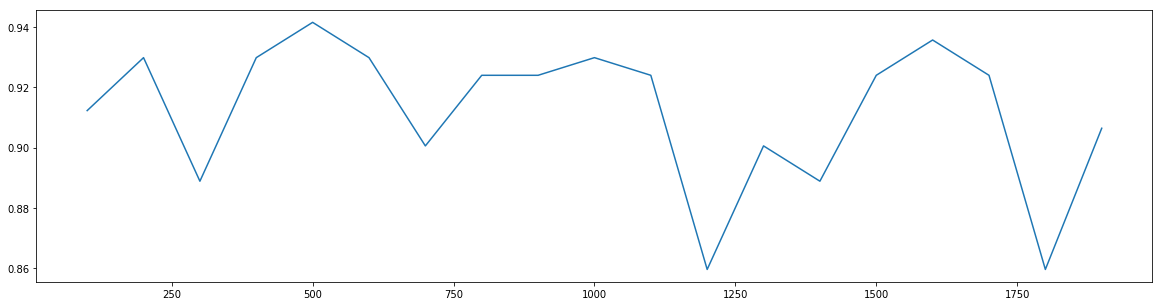

In [23]:
##看来结果上升了，我们通过学习曲线来看下变化趋势
s = []
for i in range(100,2000,100):
    dnn = DNN(hidden_layer_sizes=i,random_state=400).fit(x_train,y_train)
    R2 = dnn.score(x_test,y_test)
    s.append(R2)
print(s.index(max(s))*100+100,max(s))
plt.figure(figsize=(20,5))
plt.plot(range(100,2000,100),s)
plt.show()

In [24]:
dnn = DNN(hidden_layer_sizes=(500,),random_state=400).fit(x_train,y_train)
dnn.score(x_test,y_test)#Returns the mean accuracy on the given test data and labels.

0.9415204678362573

d:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1 0.9239766081871345


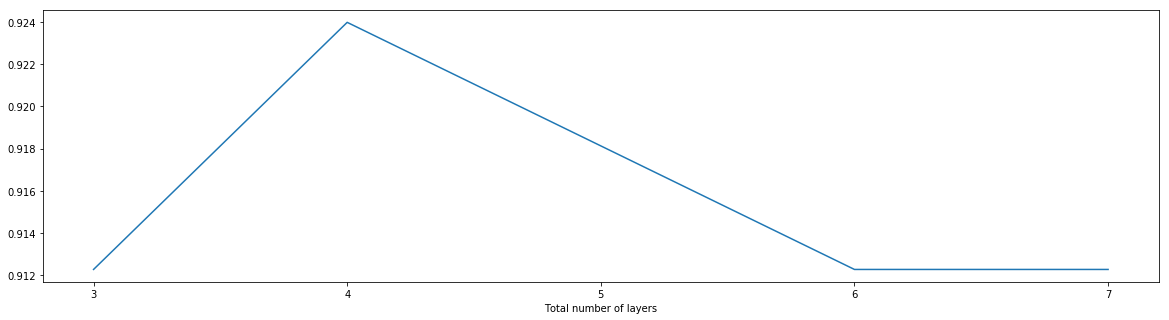

In [29]:
##如果增加隐层呢？？？（保持神经元个数不变）
s = []
layers = [(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)]
for i in layers:
    dnn = DNN(hidden_layer_sizes=i,random_state=400).fit(x_train,y_train)
    R2 = dnn.score(x_test,y_test)
    s.append(R2)
print(s.index(max(s)),max(s))
plt.figure(figsize=(20,5))
plt.plot(range(3,8),s)
plt.xticks([3,4,5,6,7])
plt.xlabel("Total number of layers")
plt.show()

In [26]:
s 

[0.9122807017543859,
 0.9239766081871345,
 0.9181286549707602,
 0.9122807017543859,
 0.9122807017543859]